Index(['name', 'country', 'achievement', 'year', 'category'], dtype='object')
(949, 5)
RangeIndex(start=0, stop=949, step=1)
                            name      country  \
0   Jacobus Henricus van 't Hoff  Netherlands   
1                Sully Prudhomme       France   
2                   Henri Dunant  Switzerland   
3                 Frédéric Passy       France   
4         Wilhelm Conrad Röntgen      Germany   
..                           ...          ...   
95                Woodrow Wilson         U.S.   
96                Johannes Stark      Germany   
97                  Jules Bordet      Belgium   
98        Walther Hermann Nernst      Germany   
99                   Knut Hamsun       Norway   

                                          achievement  year  \
0      laws of chemical dynamics and osmotic pressure  1901   
1                                                      1901   
2                                                      1901   
3                                 

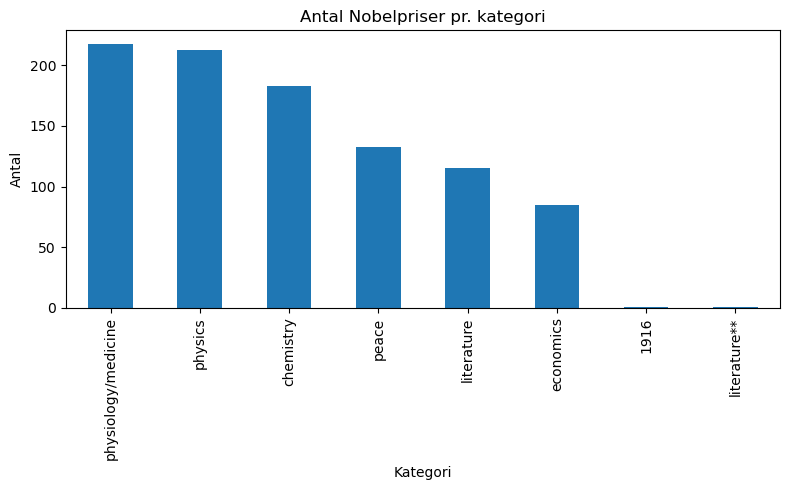

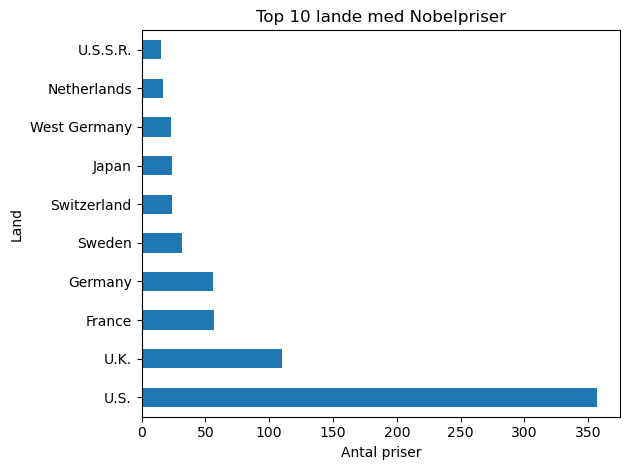

In [57]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import hashlib

url = "https://raw.githubusercontent.com/sharmadhiraj/free-json-datasets/refs/heads/master/datasets/nobel-prize-winners-by-year.json"
df = load_json_data(url)
df = clean_data(df)
df = anonymize_names(df)
plot_nobel_categories(df)
plot_top_countries(df)

def load_json_data(url):
    response = requests.get(url)
    data = response.json()
    # Brug json_normalize til at flade alle niveauer ud
    df = pd.json_normalize(
        data,
        record_path=['winners', 'winners'],      # Dyk ned til listen af vindere
        meta=[
            'year',
            ['winners', 'category']              # Hent kategori fra mellemniveauet
        ])
    df.rename(columns={'winners.category': 'category'}, inplace=True)
    #To print all the column names of the DataFrame,
    print(df.columns)
    print(df.shape)
    #to get number of rows - our dataset contains 5000 rows, from index 0 to 5000.
    print(df.index)
    print(df.head(100))
    return df

def clean_data(df):
     # Antal tomme strenge pr. kolonne
    empty_counts = (df == "").sum()  

    # Procent pr. kolonne
    empty_percent = (empty_counts / len(df)) * 100  
    print("Procent tomme strenge pr. kolonne:")
    print(empty_percent)
    
    print("andre null værdier:")
    print(df.isnull().sum())

    # Erstat tomme strenge med "not specified"
    df = df.replace("", "not specified")

    # Erstat NaN/null med "not specified"
    df = df.fillna("not specified")

    return df

def anonymize_names(df):
    df['name'] = df['name'].apply(lambda x: hashlib.sha256(x.encode()).hexdigest() if pd.notnull(x) else x)
    return df


def plot_nobel_categories(df):
    df['category'].value_counts().plot(kind='bar', figsize=(8, 5))
    plt.title("Antal Nobelpriser pr. kategori")
    plt.xlabel("Kategori")
    plt.ylabel("Antal")
    plt.tight_layout()
    plt.show()

def plot_top_countries(df):
    df['country'].value_counts().head(10).plot(kind='barh')
    plt.title("Top 10 lande med Nobelpriser")
    plt.xlabel("Antal priser")
    plt.ylabel("Land")
    plt.tight_layout()
    plt.show()


